## 2020년 주유소 판매가격 데이터를 통한 소비자 입장 데이터 분석

 - 지역별 브랜드 가격 평균 비교(휘발유, 경유)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

### 01. 데이터 불러오기

In [3]:
# 상반기 주유소 판매 데이터 불러오기
first = pd.read_csv('../data/2020년 상반기 주유소 판매가격.csv', encoding='CP949')
first = first.dropna()
first

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0
5,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 05월,SK에너지,셀프,1565.00,1350.81,1197.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2990,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 02월,SK에너지,셀프,1872.93,1542.14,1365.55,0.0
2991,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 03월,SK에너지,셀프,1798.10,1479.32,1278.87,0.0
2992,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 04월,SK에너지,셀프,1652.93,1322.80,1128.67,0.0
2993,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 05월,SK에너지,셀프,1593.19,1252.55,1058.48,0.0


In [4]:
# 하반기 주유소 판매 데이터 불러오기
second = pd.read_csv('../data/2020년 하반기 주유소 판매가격.csv', encoding='CP949')
second = second.dropna()
second

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 07월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 08월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 09월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 10월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
5,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 11월,SK에너지,셀프,1635.0,1415.67,1245.67,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2946,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.0,1402.65,1211.10,0.0
2947,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.0,1393.00,1203.00,0.0
2948,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.0,1338.42,1148.42,0.0
2949,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.0,1292.00,1092.37,0.0


### 02.데이터 결합

In [5]:
df = pd.concat([first, second], ignore_index=True)
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 05월,SK에너지,셀프,1565.00,1350.81,1197.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5939,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.00,1402.65,1211.10,0.0
5940,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.00,1393.00,1203.00,0.0
5941,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.00,1338.42,1148.42,0.0
5942,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.00,1292.00,1092.37,0.0


### 03.데이터 가공 및 분석

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5944 entries, 0 to 5943
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      5944 non-null   object 
 1   지역      5944 non-null   object 
 2   상호      5944 non-null   object 
 3   주소      5944 non-null   object 
 4   기간      5944 non-null   object 
 5   상표      5944 non-null   object 
 6   셀프여부    5944 non-null   object 
 7   고급휘발유   5944 non-null   float64
 8   휘발유     5944 non-null   float64
 9   경유      5944 non-null   float64
 10  실내등유    5944 non-null   float64
dtypes: float64(4), object(7)
memory usage: 510.9+ KB


In [7]:
df['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

In [8]:
df['시'] = [add.split()[0] for add in df['지역']]
df['구'] = [add.split()[1] for add in df['지역']]
df.loc[df['시']=='서울','시']='서울특별시'
df.head()


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0,서울특별시,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0,서울특별시,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0,서울특별시,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0,서울특별시,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 05월,SK에너지,셀프,1565.00,1350.81,1197.74,0.0,서울특별시,강남구


In [9]:
df['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [10]:
df.drop(['고급휘발유', '실내등유'], axis=1, inplace=True)
df

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유,시,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1657.00,1495.00,서울특별시,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1637.97,1483.97,서울특별시,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1570.61,1431.13,서울특별시,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1425.33,1290.00,서울특별시,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 05월,SK에너지,셀프,1350.81,1197.74,서울특별시,강남구
...,...,...,...,...,...,...,...,...,...,...,...
5939,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1402.65,1211.10,서울특별시,중랑구
5940,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1393.00,1203.00,서울특별시,중랑구
5941,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1338.42,1148.42,서울특별시,중랑구
5942,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1292.00,1092.37,서울특별시,중랑구


In [27]:
region_brand = round(df.pivot_table(index=['구','상표'], values=['휘발유','경유'], aggfunc='mean', margins=True), 2)
region_brand.reset_index(inplace=True)
region_brand

gs = region_brand[region_brand['상표']=='GS칼텍스']
soil = region_brand[region_brand['상표']=='S-OIL']
sk = region_brand[region_brand['상표']=='SK에너지']
hyundai = region_brand[region_brand['상표']=='현대오일뱅크']

gangnam = region_brand[region_brand['구']=='강남구']
jonglo = region_brand[region_brand['구']=='종로구']
seocho = region_brand[region_brand['구']=='서초구']
gangseo = region_brand[region_brand['구']=='강서구']
mapo = region_brand[region_brand['구']=='마포구']
dongdaemun = region_brand[region_brand['구']=='동대문구']



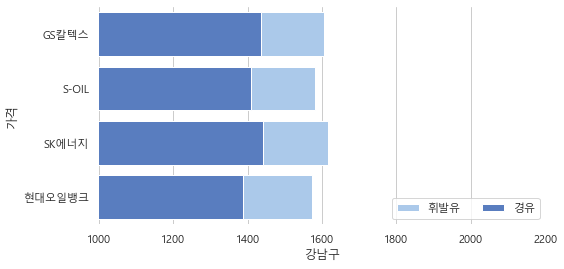

In [29]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=gangnam,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=gangnam,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="강남구")
sns.despine(left=True, bottom=True)


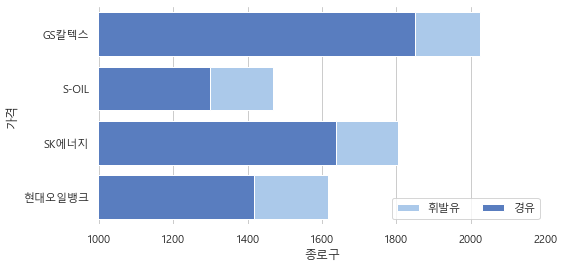

In [30]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=jonglo,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=jonglo,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="종로구")
sns.despine(left=True, bottom=True)


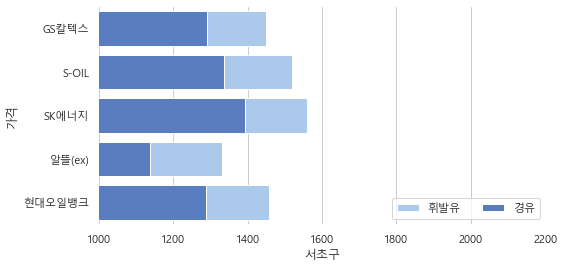

In [31]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=seocho,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=seocho,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="서초구")
sns.despine(left=True, bottom=True)


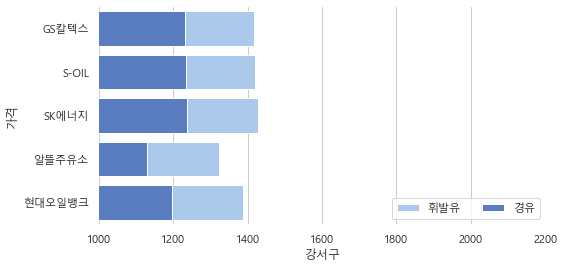

In [32]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=gangseo,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=gangseo,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="강서구")
sns.despine(left=True, bottom=True)


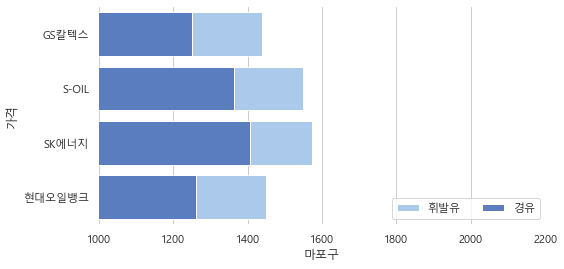

In [34]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=mapo,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=mapo,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="마포구")
sns.despine(left=True, bottom=True)


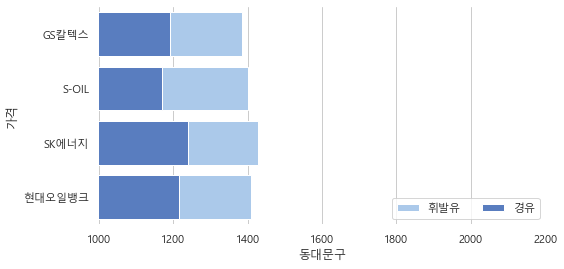

In [33]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=dongdaemun,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=dongdaemun,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="동대문구")
sns.despine(left=True, bottom=True)


### 결론
    회사별로 지역별로 다른 판매 전략을 구사할 수 있겠다고 예상하였으나
    주거지역/업무지역 구분에 따라 회사별 가격이 상이하다고 보기는 어렵다